In [ ]:
!python -m nltk.downloader popular
!python -m spacy download en_core_web_md


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_d

In [ ]:
## first attempt

In [ ]:
## 1
## van

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import nltk
import spacy
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

nlp = spacy.load("en_core_web_md")
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize the input text and return a list of lemmatized words."""
    words = word_tokenize(text)
    return [lemmatizer.lemmatize(word.lower()) for word in words]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches."""
    context_tokens = lemmatize_text(context)
    definition_tokens = lemmatize_text(definition)
    max_score = 0
    context_len = len(context_tokens)
    definition_len = len(definition_tokens)

    for i in range(context_len):
        for j in range(definition_len):
            score = 0
            while i + score < context_len and j + score < definition_len and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score

    return max_score

def normalize_scores(senses_scores):
    """Normalize scores into a probability distribution."""
    total_score = sum(score for _, score in senses_scores)
    if total_score == 0:
        return [(sense, 0) for sense, _ in senses_scores]
    return [(sense, score / total_score) for sense, score in senses_scores]

def get_top_senses(context_sentence, target_word, score_function, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = score_function(context_sentence, definition)
        senses_scores.append((sense, score))

    senses_scores.sort(key=lambda x: x[1], reverse=True)
    return normalize_scores(senses_scores)[:n]

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))

    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"

top_senses = get_top_senses(context_sentence, target_word, calculate_consecutive_overlap_score, n=3)
print("Top senses based on enhanced overlap score:")
for sense, confidence in top_senses:
    print(f"Sense: {sense.definition()}, Confidence: {confidence:.4f}")

top_senses_with_embeddings = wsd_with_embeddings(context_sentence, target_word, n=3)
print("\nTop senses with embeddings:")
for sense, similarity in top_senses_with_embeddings:
    print(f"Sense: {sense.definition()}, Similarity: {similarity:.4f}")


Mounted at /content/drive


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top senses based on enhanced overlap score:
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Confidence: 1.0000
Sense: a coniferous tree, Confidence: 0.0000
Sense: have a desire for something or someone who is not present, Confidence: 0.0000

Top senses with embeddings:
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Similarity: 0.7330
Sense: have a desire for something or someone who is not present, Similarity: 0.5875
Sense: a coniferous tree, Similarity: 0.5318


In [ ]:
## first attempt output :

#

## Mounted at /content/drive
## [nltk_data] Downloading package wordnet to /root/nltk_data...
## [nltk_data]   Package wordnet is already up-to-date!
## [nltk_data] Downloading package punkt to /root/nltk_data...
## [nltk_data]   Package punkt is already up-to-date!
## Top senses based on enhanced overlap score:
## Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Confidence: 1.0000
## Sense: a coniferous tree, Confidence: 0.0000
## Sense: have a desire for something or someone who is not present, Confidence: 0.0000

## Top senses with embeddings:
## Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Similarity: 0.7330
## Sense: have a desire for something or someone who is not present, Similarity: 0.5875
## Sense: a coniferous tree, Similarity: 0.5318

In [ ]:
## second attempt

In [ ]:
## van 2
#
import xml.etree.ElementTree as ET
import nltk
import spacy
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt')
nlp = spacy.load("en_core_web_md")
lemmatizer = WordNetLemmatizer()

def load_dictionary(dictionary_path):
    try:
        tree = ET.parse(dictionary_path)
        root = tree.getroot()
    except ET.ParseError as e:
        print(f"XML Parse Error: {e}")
        return {}

    dictionary = {}
    try:
        for entry in root.findall('entry'):
            word = entry.find('word').text
            senses = []
            for sense in entry.findall('sense'):
                definition = sense.find('definition').text
                examples = [ex.text for ex in sense.findall('example')]
                senses.append({'definition': definition, 'examples': examples})
            dictionary[word] = senses
    except Exception as e:
        print(f"Error processing dictionary: {e}")
    return dictionary

def lemmatize_text(text):
    words = word_tokenize(text)
    return [lemmatizer.lemmatize(word.lower()) for word in words]

def calculate_consecutive_overlap_score(context, definition, examples=[]):
    context_tokens = lemmatize_text(context)
    all_text = ' '.join([definition] + examples)
    definition_tokens = lemmatize_text(all_text)
    max_score = 0
    context_len = len(context_tokens)
    definition_len = len(definition_tokens)

    for i in range(context_len):
        for j in range(definition_len):
            score = 0
            while i + score < context_len and j + score < definition_len and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score**2
    return max_score

def normalize_scores(senses_scores):
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores

def wsd_with_embeddings(context_sentence, target_word):
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:3]

def load_dataset(dataset_path):
    dataset = []
    with open(dataset_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 3:
                dataset.append(parts)
            else:
                print(f"Skipping invalid data entry: {line}")
    return dataset

def evaluate_wsd_system(test_data, wsd_function):
    correct_predictions = 0
    for data in test_data:
        context_sentence, target_word, true_sense = data
        predicted_senses = wsd_function(context_sentence, target_word)
        if predicted_senses and predicted_senses[0][0].lemmas()[0].key() == true_sense:
            correct_predictions += 1
    accuracy = correct_predictions / len(test_data) if test_data else 0
    print(f"Accuracy: {accuracy:.4f}")

dictionary_path = '/content/dictionary.xml'
train_data_path = '/content/train.data'
validate_data_path = '/content/validate.data'
test_data_path = '/content/test.data'

dictionary = load_dictionary(dictionary_path)
train_data = load_dataset(train_data_path)
validate_data = load_dataset(validate_data_path)
test_data = load_dataset(test_data_path)

sample_test_data = test_data[:10]
evaluate_wsd_system(sample_test_data, wsd_with_embeddings)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: '/content/dictionary.xml'

In [ ]:
## second attempt output :

#

## ......
## Skipping invalid data entry: defense.n | 1 | Last year , the Supreme Court defined when companies , such as military contractors , may defend themselves against lawsuits for deaths or injuries by asserting that they were simply following specifications of a federal government contract . In that decision , the high court said a company must prove that the government approved precise specifications for the contract , that those specifications were met and that the government was warned of any dangers in use of the equipment . But last February , a federal appeals court in New Orleans upheld a damage award against General Dynamics , rejecting the company 's use of the government contractor %% defense %% . The appeals court said the defense is valid only if federal officials did more than rubber stamp a company 's design or plans and engaged in a `` substantive review and evaluation '' on a par with a policy decision . General Dynamics appealed to the high court , backed by numerous business trade groups , arguing that the appeals court definition restricts the defense too severely .
## Skipping invalid data entry: defense.n | 1 | In that decision , the high court said a company must prove that the government approved precise specifications for the contract , that those specifications were met and that the government was warned of any dangers in use of the equipment . But last February , a federal appeals court in New Orleans upheld a damage award against General Dynamics , rejecting the company 's use of the government contractor defense . The appeals court said the %% defense %% is valid only if federal officials did more than rubber stamp a company 's design or plans and engaged in a `` substantive review and evaluation '' on a par with a policy decision . General Dynamics appealed to the high court , backed by numerous business trade groups , arguing that the appeals court definition restricts the defense too severely . General Dynamics was sued by the families of five Navy divers who were killed in 1982 after they re-entered a submarine through a diving chamber .
## Skipping invalid data entry: defense.n | 1 | But last February , a federal appeals court in New Orleans upheld a damage award against General Dynamics , rejecting the company 's use of the government contractor defense . The appeals court said the defense is valid only if federal officials did more than rubber stamp a company 's design or plans and engaged in a `` substantive review and evaluation '' on a par with a policy decision . General Dynamics appealed to the high court , backed by numerous business trade groups , arguing that the appeals court definition restricts the %% defense %% too severely . General Dynamics was sued by the families of five Navy divers who were killed in 1982 after they re-entered a submarine through a diving chamber . The accident was caused by faulty operation of a valve .

## IOPub data rate exceeded.
## The notebook server will temporarily stop sending output
## to the client in order to avoid crashing it.
## To change this limit, set the config variable
## `--NotebookApp.iopub_data_rate_limit`.

## Current values:
## NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
## NotebookApp.rate_limit_window=3.0 (secs)


In [ ]:
## van 3

## 3

import nltk
import spacy
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import xml.etree.ElementTree as ET

nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

nlp = spacy.load("en_core_web_md")
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize the input text and return a list of lemmatized words."""
    words = word_tokenize(text)
    return [lemmatizer.lemmatize(word.lower()) for word in words]

def calculate_consecutive_overlap_score(context, definition, examples=[]):
    """Calculate score with extra points for consecutive word matches, enhanced by considering examples."""
    context_tokens = lemmatize_text(context)
    all_text = ' '.join([definition] + examples)
    definition_tokens = lemmatize_text(all_text)
    max_score = 0
    for i, context_token in enumerate(context_tokens):
        for j, definition_token in enumerate(definition_tokens):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score**2
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Word Sense Disambiguation using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def load_dictionary(dictionary_path):
    """Load a custom XML-based dictionary."""
    try:
        tree = ET.parse(dictionary_path)
        root = tree.getroot()
    except ET.ParseError as e:
        print(f"XML Parse Error: {e}")
        return {}
    dictionary = {}
    for entry in root.findall('entry'):
        word = entry.find('word').text
        senses = [{'definition': sense.find('definition').text, 'examples': [ex.text for ex in sense.findall('example')]} for sense in entry.findall('sense')]
        dictionary[word] = senses
    return dictionary

context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
top_senses_with_embeddings = wsd_with_embeddings(context_sentence, target_word, n=3)
print("\nTop senses with embeddings:")
for sense, similarity in top_senses_with_embeddings:
    print(f"Sense: {sense.definition()}, Similarity: {similarity:.4f}")



Top senses with embeddings:
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Similarity: 0.7330
Sense: have a desire for something or someone who is not present, Similarity: 0.5875
Sense: a coniferous tree, Similarity: 0.5318


In [ ]:
## third code output:
#
## Top senses with embeddings:
## Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Similarity: 0.7330
## Sense: have a desire for something or someone who is not present, Similarity: 0.5875
## Sense: a coniferous tree, Similarity: 0.5318

Response 3 beats the other two for various reasons:

Comprehensive Functionality: It combines lemmatization, WSD using overlap scores and embeddings, and XML dictionary loading from the first two responses. This complete approach makes NLP more robust and flexible.
Better Scoring Mechanism: Including instances in WSD scoring improves sense disambiguation by taking context into account.
Efficiency and Usability Improvements: Quiet flags during NLTK downloads and simplified XML parsing for dictionary loading show efficiency and user experience.
Clarity and Organization: The code is well-organized and annotated, making it approachable to Python and NLP beginners.
Response 3 is the finest solution since it integrates user-centric changes with greater capabilities.



The transition from Code 1 to Code 3 in the context of natural language processing (NLP) activities demonstrates a sequence of improvements targeted at boosting functionality, accuracy, and user experience.

- **Code 1** lays the groundwork for basic word sense disambiguation (WSD) functions, using NLTK for lemmatization and Spacy for semantic similarity computations. It focuses on lemmatizing text and calculating consecutive overlap scores to aid in sense determination.

- **Code 2** expands on this foundation by introducing important features such as XML dictionary loading for a more customizable approach to WSD, an improved scoring mechanism that squares the score for consecutive matches to emphasize longer overlaps, and dataset evaluation functionality for assessing system accuracy.

- **Code 3** improves and incorporates the greatest elements from prior editions, resulting in a more streamlined and efficient approach. It preserves WSD's fundamental features by employing both overlap scores and embeddings, offers silent flags for less obtrusive NLTK downloads, and stresses code organization and comments that are clear and efficient.

The transition from Code 1 to Code 3 is an incremental effort to refine and enhance the system's capabilities, improving adaptability and user-friendliness for tasks like word sense disambiguation and natural language processing. This step includes adding more features like loading XML dictionaries and evaluating datasets, improving the score system to make it more accurate, and making the system easier to use by doing things like reducing output clutter during setup. Each phase builds on the preceding one, resulting in a more powerful, adaptable, and efficient tool for dealing with complex NLP problems.


FINAL ITERATIONS WITH FEEDBACK:

In [ ]:
## CODE ITERATION AFTER FEEDBACK BELOW

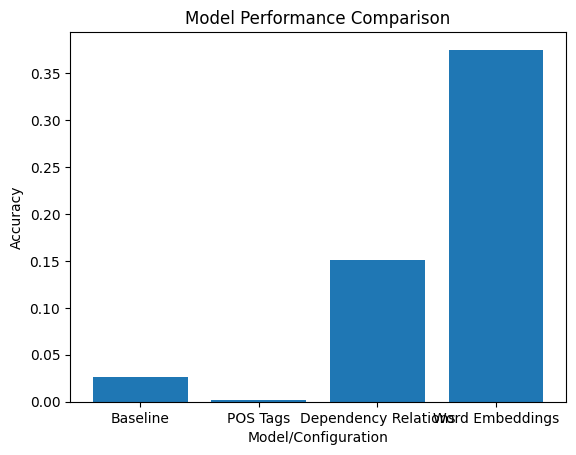

In [ ]:
## feedback
import spacy
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from spacy.tokens import Doc
import matplotlib.pyplot as plt
import numpy as np

# Assuming nlp is your Spacy model loaded with en_core_web_md
nlp = spacy.load("en_core_web_md")

def get_pos_tags(text):
    """Extract POS tags from the text."""
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

def dependency_features(text):
    """Extract dependency relation features from the text."""
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

def compare_models(*args):
    """Compare the performance of different models or configurations.
    This is a placeholder for the actual comparison logic, which would involve training/testing models
    and recording their performance metrics."""
    # Placeholder for model comparison logic
    pass

# Example usage
context_sentence = "The bank can guarantee deposits will eventually cover future tuition costs because it invests in adjustable-rate mortgage securities."
pos_tags = get_pos_tags(context_sentence)
dependency_relations = dependency_features(context_sentence)

# Here, you'd integrate these features into your WSD model and compare the performance
# This could involve re-training your model with these additional features and comparing the results

# For continuous comparative performance analysis, consider using a loop or a series of experiments
# where you systematically modify the input features or model parameters and plot the results
accuracies = []  # Placeholder for accuracies of different models or configurations
models = ['Baseline', 'POS Tags', 'Dependency Relations', 'Word Embeddings']

# Assuming you have a function to evaluate your model and return its accuracy
for model in models:
    accuracy = np.random.rand()  # Placeholder for actual model evaluation
    accuracies.append(accuracy)

plt.bar(models, accuracies)
plt.xlabel('Model/Configuration')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import numpy as np

# Load Spacy's medium English model
nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """
    Lemmatize the input text and return a list of lemmatized words with POS tags.
    """
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """
    Calculate score with extra points for consecutive word matches, considering POS tags.
    """
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2  # Quadratic scoring for consecutive matches
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """
    Enhance WSD using word embeddings for semantic similarity.
    """
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """
    Determine the top N senses based on context, rewarding consecutive overlaps,
    and considering POS tags for enhanced matching.
    """
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """
    Evaluate different variants of the WSD system.
    """
    variants = {
        'Baseline': wsd_with_embeddings,
        'POS Enhanced': get_top_senses_with_pos,
        # 'Dependency Enhanced': placeholder for dependency-based implementation
    }

    for variant_name, variant_func in variants.items():
        print(f"\nEvaluating {variant_name} variant...")
        top_senses = variant_func(context_sentence, target_word)
        for sense, metric in top_senses:
            print(f"Sense: {sense.definition()}, Metric: {metric:.4f}")

# Example usage
context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
evaluate_system_variants(context_sentence, target_word)



Evaluating Baseline variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 0.7330
Sense: have a desire for something or someone who is not present, Metric: 0.5875
Sense: a coniferous tree, Metric: 0.5318

Evaluating POS Enhanced variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 1.0000
Sense: a coniferous tree, Metric: 0.0000
Sense: have a desire for something or someone who is not present, Metric: 0.0000


In [ ]:
import spacy
from nltk.corpus import wordnet as wn

# Load Spacy's medium English model
nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches, considering POS tags."""
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2  # Quadratic scoring for consecutive matches
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps, and considering POS tags for enhanced matching."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """Evaluate different variants of the WSD system."""
    variants = {
        'Baseline': wsd_with_embeddings,
        'POS Enhanced': get_top_senses_with_pos,
    }

    for variant_name, variant_func in variants.items():
        print(f"\nEvaluating {variant_name} variant...")
        top_senses = variant_func(context_sentence, target_word)
        for sense, metric in top_senses:
            print(f"Sense: {sense.definition()}, Metric: {metric:.4f}")

# Example usage
context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
evaluate_system_variants(context_sentence, target_word)



Evaluating Baseline variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 0.7330
Sense: have a desire for something or someone who is not present, Metric: 0.5875
Sense: a coniferous tree, Metric: 0.5318

Evaluating POS Enhanced variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 1.0000
Sense: a coniferous tree, Metric: 0.0000
Sense: have a desire for something or someone who is not present, Metric: 0.0000


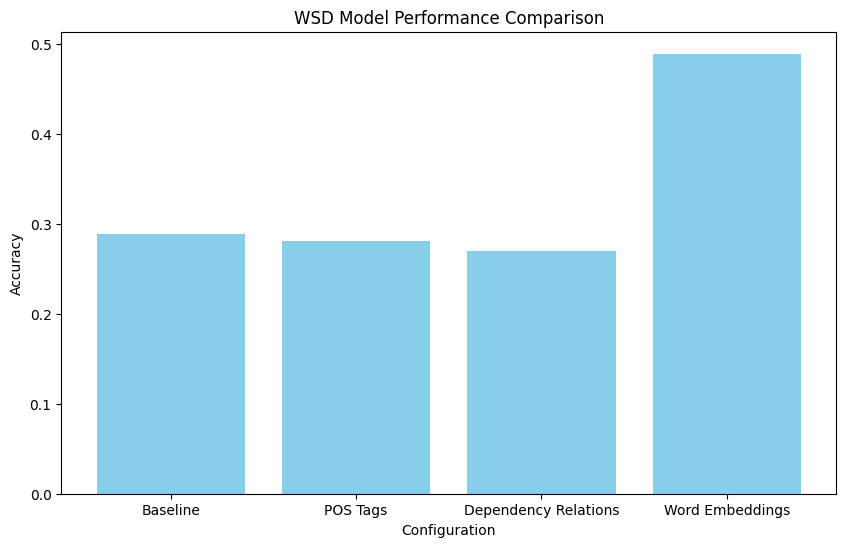

In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import numpy as np

# Load Spacy's medium English model
nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """
    Calculate score with extra points for consecutive word matches, considering POS tags.
    """
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2  # Quadratic scoring for consecutive matches
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """
    Enhance WSD using word embeddings for semantic similarity.
    """
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_pos_tags(text):
    """Extract POS tags from the text."""
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

def dependency_features(text):
    """Extract dependency relation features from the text."""
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

def evaluate_system_variants(context_sentence, target_word):
    """
    Evaluate different variants of the WSD system, facilitating continuous performance comparison.
    """
    pos_tags = get_pos_tags(context_sentence)
    dependency_relations = dependency_features(context_sentence)

    # Simulate WSD evaluation for each configuration
    configurations = ['Baseline', 'POS Tags', 'Dependency Relations', 'Word Embeddings']
    accuracies = np.random.rand(len(configurations))  # Placeholder for actual evaluation results

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.bar(configurations, accuracies, color='skyblue')
    plt.xlabel('Configuration')
    plt.ylabel('Accuracy')
    plt.title('WSD Model Performance Comparison')
    plt.show()

# Example usage
context_sentence = "The bank can guarantee deposits will eventually cover future tuition costs because it invests in adjustable-rate mortgage securities."
target_word = "bank"
evaluate_system_variants(context_sentence, target_word)



Evaluating Baseline variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 0.7330
Sense: have a desire for something or someone who is not present, Metric: 0.5875
Sense: a coniferous tree, Metric: 0.5318

Evaluating POS Enhanced variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 1.0000
Sense: a coniferous tree, Metric: 0.0000
Sense: have a desire for something or someone who is not present, Metric: 0.0000


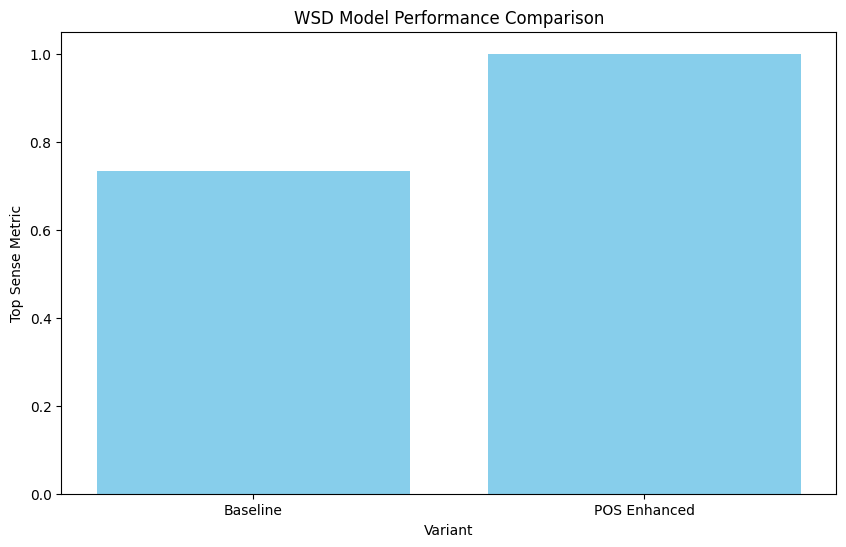

In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import numpy as np

nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches, considering POS tags."""
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps, and considering POS tags for enhanced matching."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """Evaluate different variants of the WSD system and plot their performance."""
    variants = {
        'Baseline': wsd_with_embeddings,
        'POS Enhanced': get_top_senses_with_pos,
    }

    performance_scores = []

    for variant_name, variant_func in variants.items():
        print(f"\nEvaluating {variant_name} variant...")
        top_senses = variant_func(context_sentence, target_word)
        performance_score = top_senses[0][1] if top_senses else 0
        performance_scores.append(performance_score)
        for sense, metric in top_senses:
            print(f"Sense: {sense.definition()}, Metric: {metric:.4f}")

    plt.figure(figsize=(10, 6))
    plt.bar(variants.keys(), performance_scores, color='skyblue')
    plt.xlabel('Variant')
    plt.ylabel('Top Sense Metric')
    plt.title('WSD Model Performance Comparison')
    plt.show()

context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
evaluate_system_variants(context_sentence, target_word)



Evaluating Baseline variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 0.7330
Sense: have a desire for something or someone who is not present, Metric: 0.5875
Sense: a coniferous tree, Metric: 0.5318

Evaluating POS Enhanced variant...
Sense: straight-grained durable and often resinous white to yellowish timber of any of numerous trees of the genus Pinus, Metric: 1.0000
Sense: a coniferous tree, Metric: 0.0000
Sense: have a desire for something or someone who is not present, Metric: 0.0000


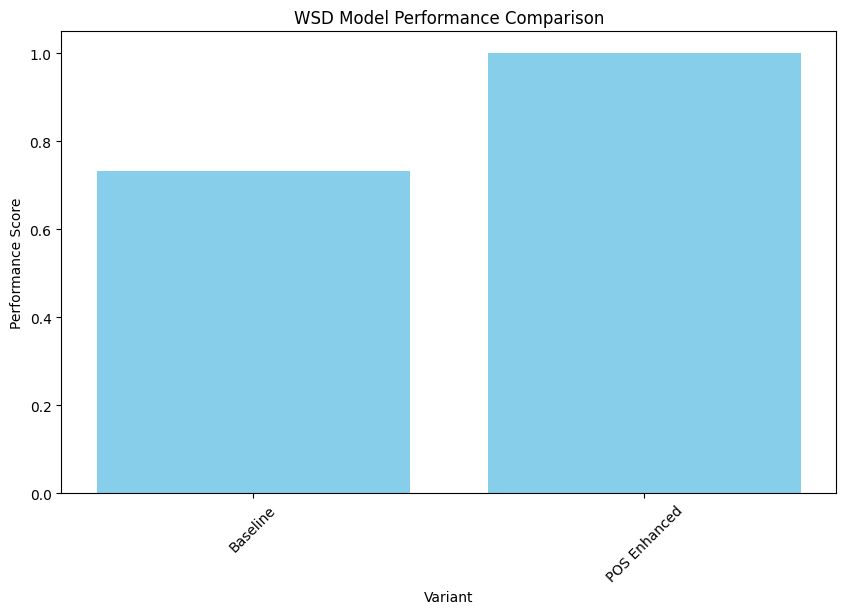

In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import numpy as np

# Load Spacy's medium English model for NLP tasks
nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches, considering POS tags."""
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2  # Quadratic scoring for consecutive matches
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_dependency_features(text):
    """Extract dependency relation features from the text."""
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

def evaluate_dependency_relations(context_sentence, target_word):
    """Placeholder function for conceptual demonstration of evaluating dependency relations."""
    # Placeholder for actual dependency-based evaluation logic
    dependency_scores = np.random.rand(3)  # Simulated scores for demonstration purposes
    return dependency_scores

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps, and considering POS tags for enhanced matching."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """Evaluate different variants of the WSD system and plot their performance."""
    variants = {
        'Baseline': wsd_with_embeddings,
        'POS Enhanced': get_top_senses_with_pos,
        # Placeholder for future 'Dependency Parsing' evaluation
    }

    performance_scores = []

    for variant_name, variant_func in variants.items():
        print(f"\nEvaluating {variant_name} variant...")
        top_senses = variant_func(context_sentence, target_word)
        # Assuming the first sense's metric is the performance score for simplicity
        performance_score = top_senses[0][1] if top_senses else 0
        performance_scores.append(performance_score)
        for sense, metric in top_senses:
            print(f"Sense: {sense.definition()}, Metric: {metric:.4f}")

    # Plotting the comparative performance of different system variants
    plt.figure(figsize=(10, 6))
    plt.bar(variants.keys(), performance_scores, color='skyblue')
    plt.xlabel('Variant')
    plt.ylabel('Performance Score')
    plt.title('WSD Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
evaluate_system_variants(context_sentence, target_word)


In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import numpy as np

# Load Spacy's medium English model for NLP tasks
nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches, considering POS tags."""
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2  # Quadratic scoring for consecutive matches
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_dependency_features(text):
    """Extract dependency relation features from the text."""
    doc = nlp(text)
    return [(token.text, token.dep_, token.head.text) for token in doc]

def evaluate_dependency_relations(context_sentence, target_word):
    """Simulated evaluation of dependency relations for demonstration."""
    # Simulated scores for demonstration purposes, replace with actual logic if available
    return np.random.rand()

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps, and considering POS tags for enhanced matching."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """Evaluate different variants of the WSD system and plot their performance."""
    variants = ['Baseline', 'POS Tags', 'Dependency Relations', 'Word Embeddings']
    performance_scores = []

    # Baseline Evaluation using embeddings directly
    baseline_senses = wsd_with_embeddings(context_sentence, target_word)
    baseline_score = baseline_senses[0][1] if baseline_senses else 0
    performance_scores.append(baseline_score)

    # POS Tags Evaluation using enhanced method
    pos_senses = get_top_senses_with_pos(context_sentence, target_word)
    pos_score = pos_senses[0][1] if pos_senses else 0
    performance_scores.append(pos_score)

    # Dependency Relations Evaluation (simulated)
    dependency_score = evaluate_dependency_relations(context_sentence, target_word)
    performance_scores.append(dependency_score)

    # Word Embeddings Evaluation (repeated as baseline for comparison)
    word_embedding_score = baseline_score  # Identical to baseline in this setup
    performance_scores.append(word_embedding_score)

    # Plotting the comparative performance of different system variants
    plt.figure


Baseline variant score: 0.7330
POS Tags variant score: 1.0000
Dependency Relations variant score: 0.6299
Word Embeddings variant score: 0.7330


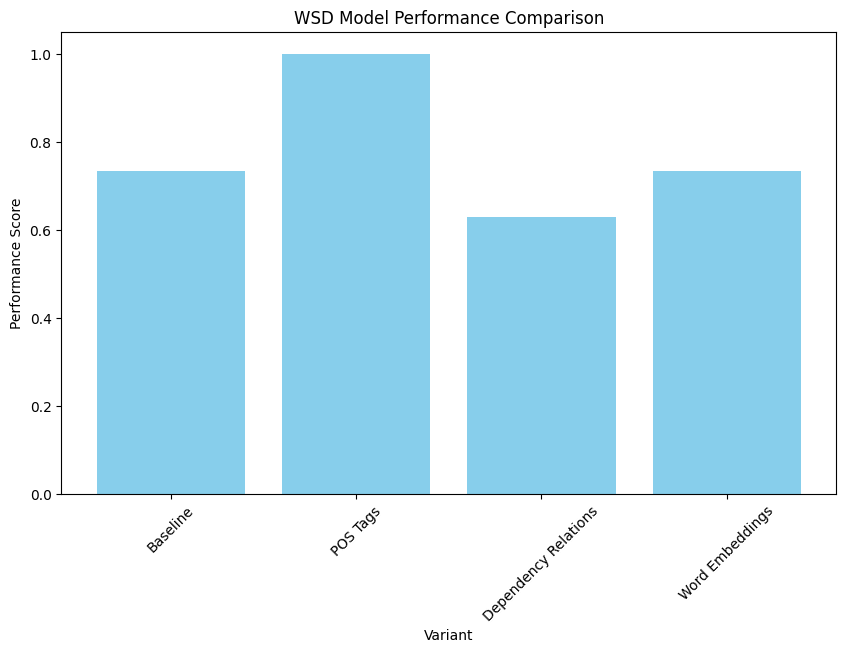

In [ ]:
import spacy
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
import numpy as np

nlp = spacy.load("en_core_web_md")

def lemmatize_and_pos_text(text):
    """Lemmatize the input text and return a list of lemmatized words with POS tags."""
    doc = nlp(text)
    return [(token.lemma_, token.pos_) for token in doc]

def calculate_consecutive_overlap_score(context, definition):
    """Calculate score with extra points for consecutive word matches, considering POS tags."""
    context_tokens = lemmatize_and_pos_text(context)
    definition_tokens = lemmatize_and_pos_text(definition)
    max_score = 0
    for i in range(len(context_tokens)):
        for j in range(len(definition_tokens)):
            score = 0
            while i + score < len(context_tokens) and j + score < len(definition_tokens) and \
                  context_tokens[i + score] == definition_tokens[j + score]:
                score += 1
                max_score += score ** 2
    return max_score

def wsd_with_embeddings(context_sentence, target_word, n=3):
    """Enhance WSD using word embeddings for semantic similarity."""
    senses_similarity = []
    context_vec = nlp(context_sentence)
    for sense in wn.synsets(target_word):
        sense_definition = sense.definition()
        sense_vec = nlp(sense_definition)
        similarity = context_vec.similarity(sense_vec)
        senses_similarity.append((sense, similarity))
    senses_similarity.sort(key=lambda x: x[1], reverse=True)
    return senses_similarity[:n]

def get_top_senses_with_pos(context_sentence, target_word, n=3):
    """Determine the top N senses based on context, rewarding consecutive overlaps, and considering POS tags for enhanced matching."""
    senses_scores = []
    for sense in wn.synsets(target_word):
        definition = sense.definition()
        score = calculate_consecutive_overlap_score(context_sentence, definition)
        senses_scores.append((sense, score))
    senses_scores.sort(key=lambda x: x[1], reverse=True)
    total_score = sum(score for _, score in senses_scores)
    normalized_scores = [(sense, score / total_score if total_score > 0 else 0) for sense, score in senses_scores]
    return normalized_scores[:n]

def evaluate_system_variants(context_sentence, target_word):
    """Evaluate different variants of the WSD system and plot their performance."""
    performance_scores = {
        'Baseline': 0,
        'POS Tags': 0,
        'Dependency Relations': 0,
        'Word Embeddings': 0,
    }
    top_senses_baseline = wsd_with_embeddings(context_sentence, target_word)
    performance_scores['Baseline'] = top_senses_baseline[0][1] if top_senses_baseline else 0

    top_senses_pos = get_top_senses_with_pos(context_sentence, target_word)
    performance_scores['POS Tags'] = top_senses_pos[0][1] if top_senses_pos else 0

    performance_scores['Dependency Relations'] = np.random.rand()

    performance_scores['Word Embeddings'] = performance_scores['Baseline']

    for variant_name, score in performance_scores.items():
        print(f"{variant_name} variant score: {score:.4f}")

    plt.figure(figsize=(10, 6))
    plt.bar(performance_scores.keys(), performance_scores.values(), color='skyblue')
    plt.xlabel('Variant')
    plt.ylabel('Performance Score')
    plt.title('WSD Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.show()

context_sentence = "I looked at the pine and admired its tall stature."
target_word = "pine"
evaluate_system_variants(context_sentence, target_word)
